In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

# run file

In [2]:
data = pd.read_csv('data.csv')
warnings.simplefilter('ignore')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data[['Quantity']].sum()

Quantity    5176450
dtype: int64

In [6]:
data[['CustomerID'] ]  == 12891

,CustomerID
0,False
1,False
2,False
3,False
4,False
...,...
541904,False
541905,False
541906,False
541907,False


# Details of Data

In [4]:
data.shape

(541909, 8)

In [5]:
data['Description'].value_counts().head(11)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
POSTAGE                               1252
Name: count, dtype: int64

In [6]:
data['StockCode'].value_counts().head(11)


StockCode
85123A    2312
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
22383     1348
Name: count, dtype: int64

In [7]:
data['Quantity'].value_counts().head(11)

Quantity
1     148227
2      81829
12     61063
6      40868
4      38484
3      37121
24     24021
10     22288
8      13129
5      11757
48      6068
Name: count, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [10]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
data['CustomerID'] = data['CustomerID'].fillna("0")

In [12]:
data['Description'] = data['Description'].fillna("0")

In [13]:
data['CustomerID'] = data['CustomerID'].astype('int64')


In [14]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
data['CustomerID'] = data['CustomerID'].astype('object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [19]:
data['Total Price'] = data['Quantity']*data['UnitPrice']


In [20]:
data['Month'] = data['InvoiceDate'].dt.month

In [21]:
data['Month'].nunique()

12

In [22]:
data['Year'] = data['InvoiceDate'].dt.year

In [23]:
data['Year-Month'] = data['Year'].astype(str) + "-" + data['Month'].astype(str).str.zfill(2)

In [24]:
data['Year'].nunique()

2

In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month,Year,Year-Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12


In [26]:
data['Country'].nunique()

38

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
 8   Total Price  541909 non-null  float64       
 9   Month        541909 non-null  int32         
 10  Year         541909 non-null  int32         
 11  Year-Month   541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(6)
memory usage: 45.5+ MB


#  Visualization

# __________Heatmap Quantity Heatmap by Country × Year-Month__________

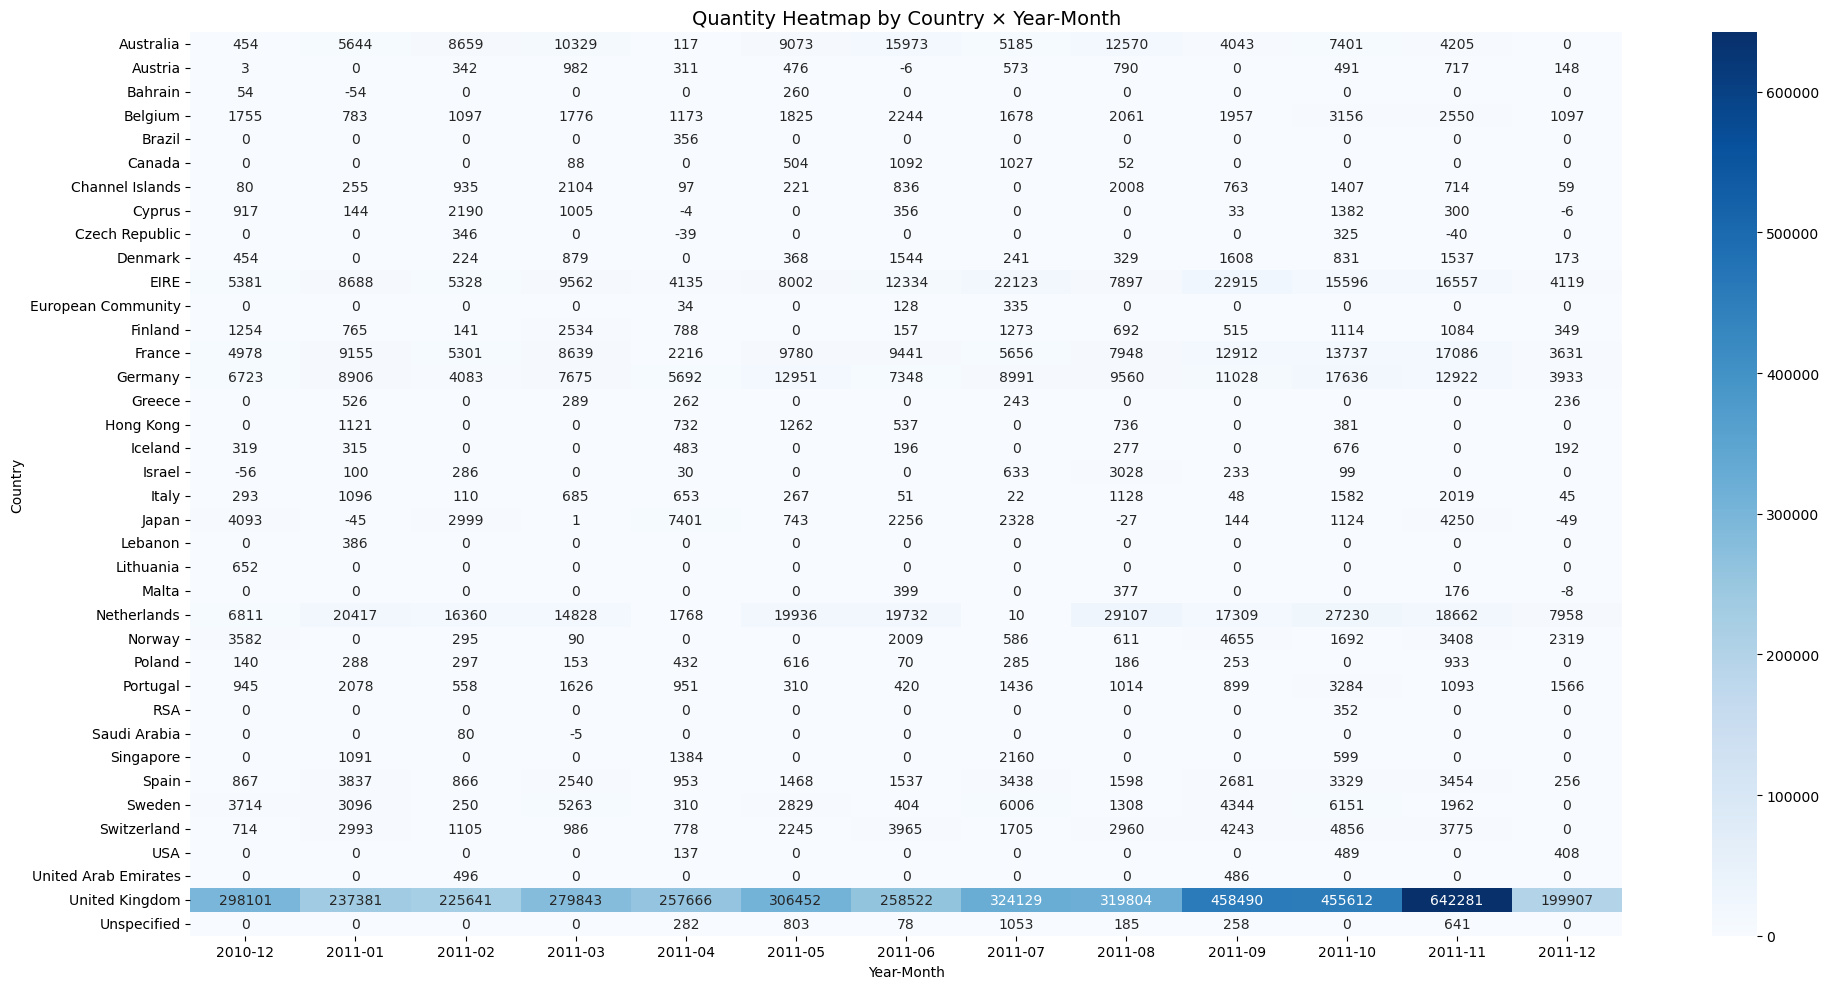

In [28]:
pivot_table = data.pivot_table(
    index='Country',
    columns= 'Year-Month',
    values= 'Quantity',
    aggfunc= 'sum',
    fill_value= 0
)
plt.figure(figsize=(20,10))
sns.heatmap(
    pivot_table,
    annot=True,
    cmap='Blues',
    fmt=".0f",
)
plt.title("Quantity Heatmap by Country × Year-Month", fontsize=14)
plt.xlabel("Year-Month")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
plt.show()

# UK has the highest quantities in all months.

# Germany, France, Netherlands, and EIRE are the next top countries.

# Some countries (e.g., Brazil, RSA, Lebanon) have very low or rare sales.

# Negative values = product returns.

# Peak sales in Nov–Dec 2011 (holiday season).

In [29]:
# pivot_table

#                               ______________________Total Quantity by Year____________________________

In [30]:
quantity_per_year=data.groupby('Year')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)


In [31]:
# quantity_per_year

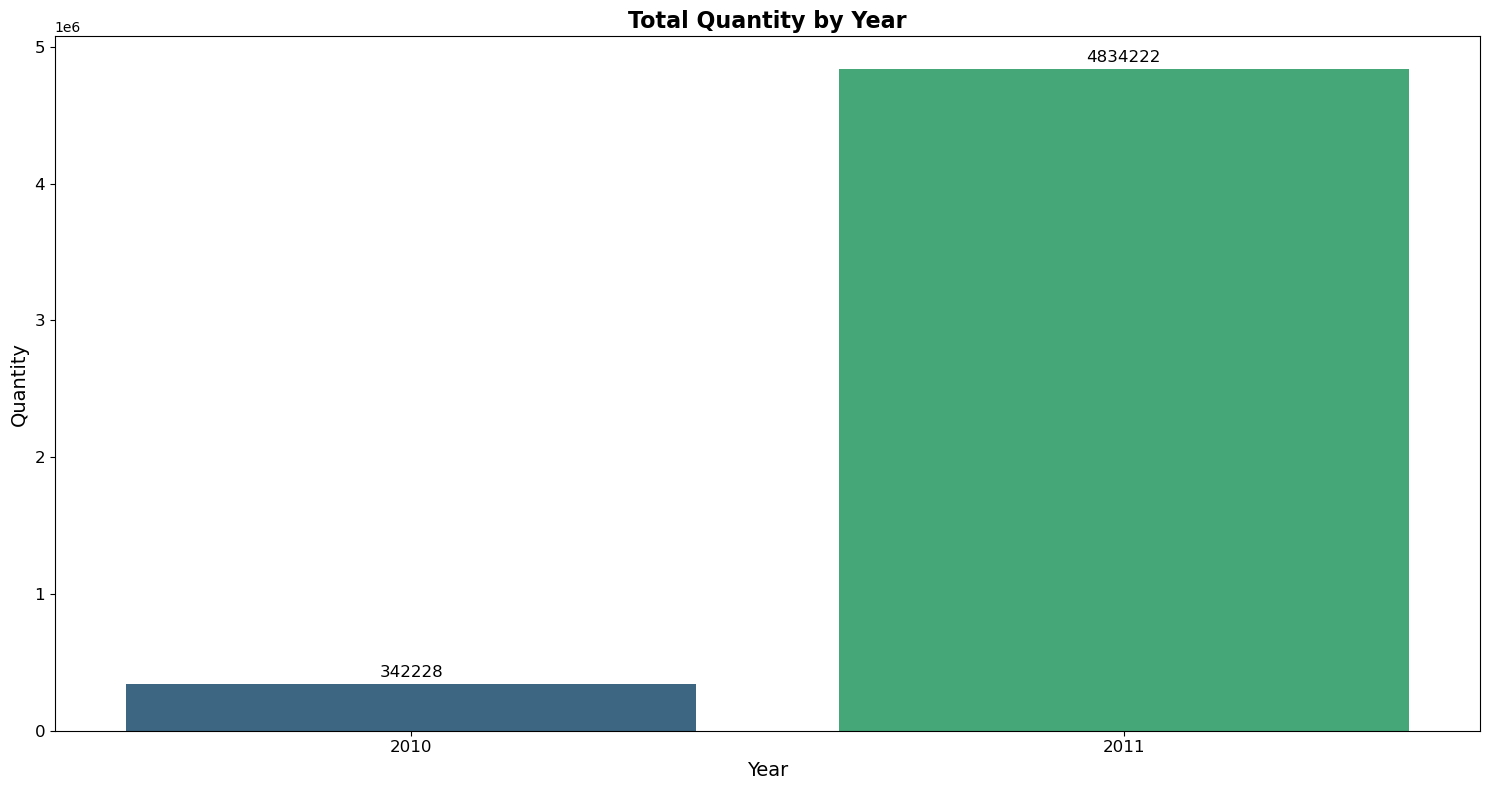

In [32]:
plt.figure(figsize=(15, 8))

ax = sns.barplot(
    data=quantity_per_year,
    x='Year',
    y='Quantity',
    palette='viridis'
)

for bars in ax.containers:
    ax.bar_label(bars, fmt='{:.0f}', fontsize=12, padding=3)

plt.title("Total Quantity by Year", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Quantity", fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

# In 2010, total quantity = 342,228.

# In 2011, total quantity = 4,834,222.

# Sales volume in 2011 was much higher than 2010 (more than ×14 growth).

# _____________________________Monthly Quantity by Year____________________________________

In [33]:
quantity_per_year_month=data.groupby(['Year','Month'])['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)


In [34]:
# quantity_per_year_month

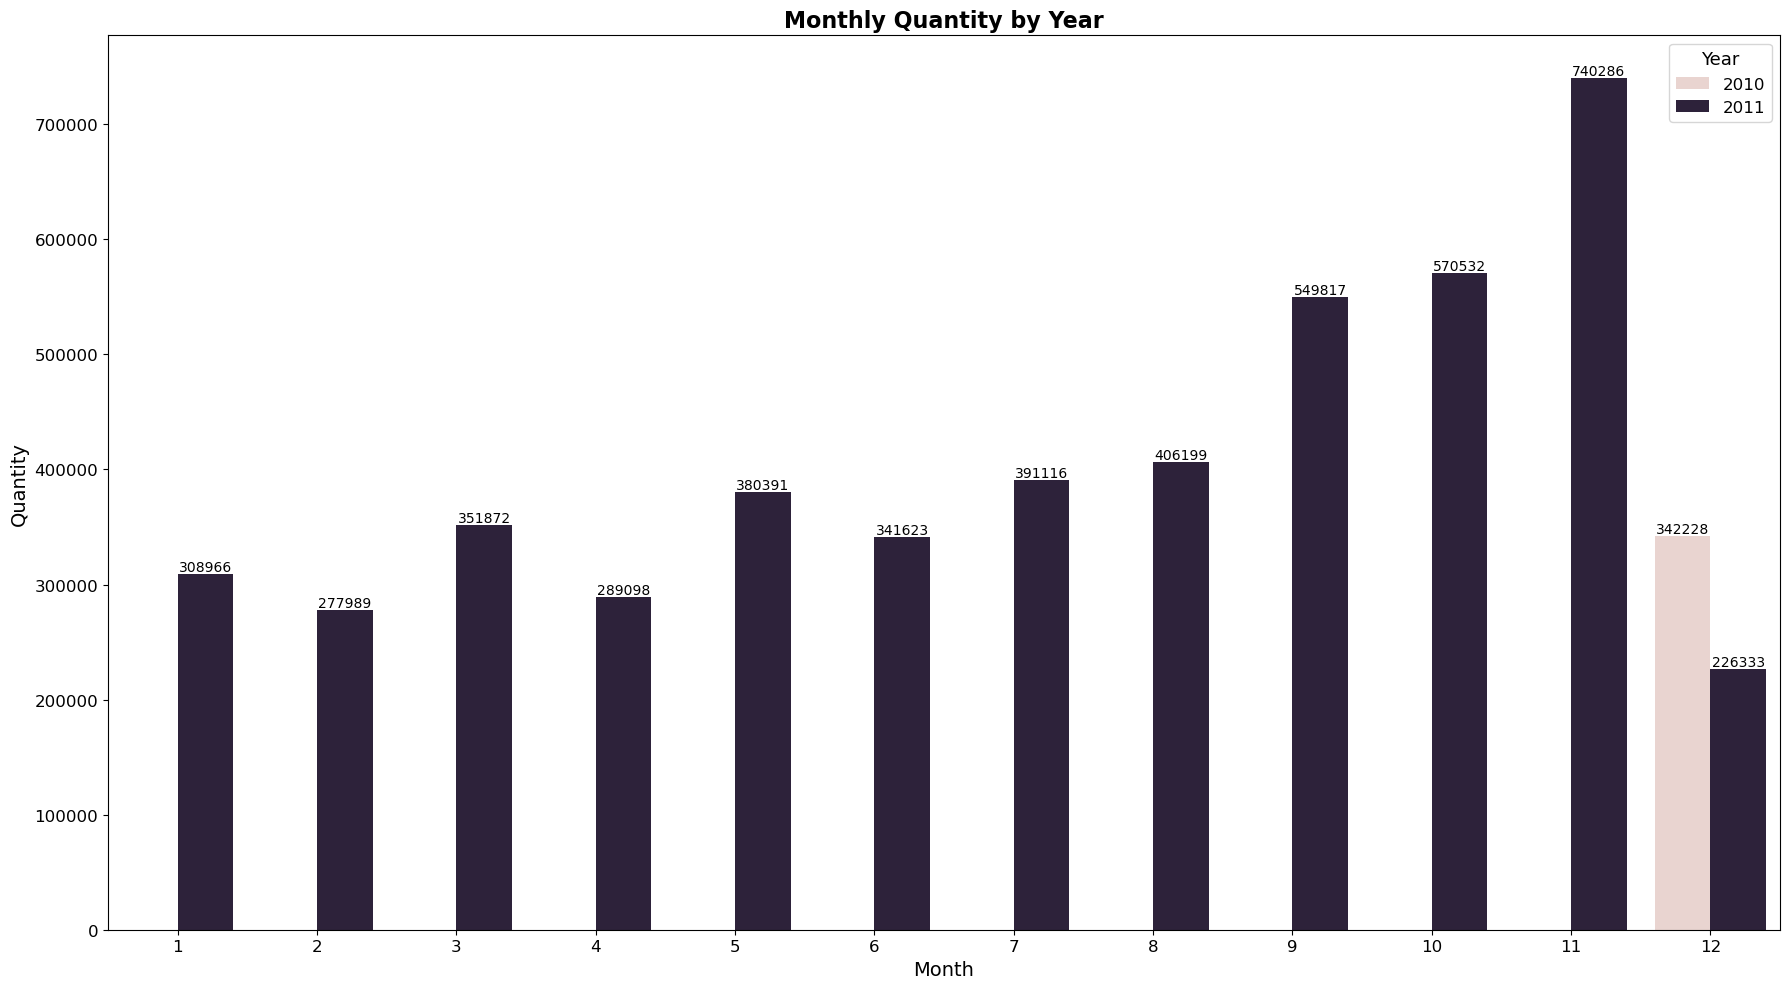

In [35]:

plt.figure(figsize=(18,10))

ax=sns.barplot(data=quantity_per_year_month,x='Month',y='Quantity',hue='Year',width=.8)
plt.xticks(rotation=90)

for bars in ax.containers:
    ax.bar_label(bars,fmt='{:.0f}')

plt.title("Monthly Quantity by Year", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Quantity", fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Year", fontsize=12, title_fontsize=13, loc="upper right")

plt.tight_layout()
plt.show()

plt.show()

# Peak sales were in Nov 2011 with 740,286 units.

# Other high months: Oct 2011 (570,532) and Sep 2011 (549,817).

# The lowest month was Dec 2011 (226,333) after the holiday season.

# Dec 2010 started with 342,228, and sales grew strongly through 2011.

In [36]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month,Year,Year-Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12


# _________Quantity per Product Description______________

In [37]:
quantity_per_description=data.groupby(['Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False).head(30)

In [38]:
# quantity_per_description

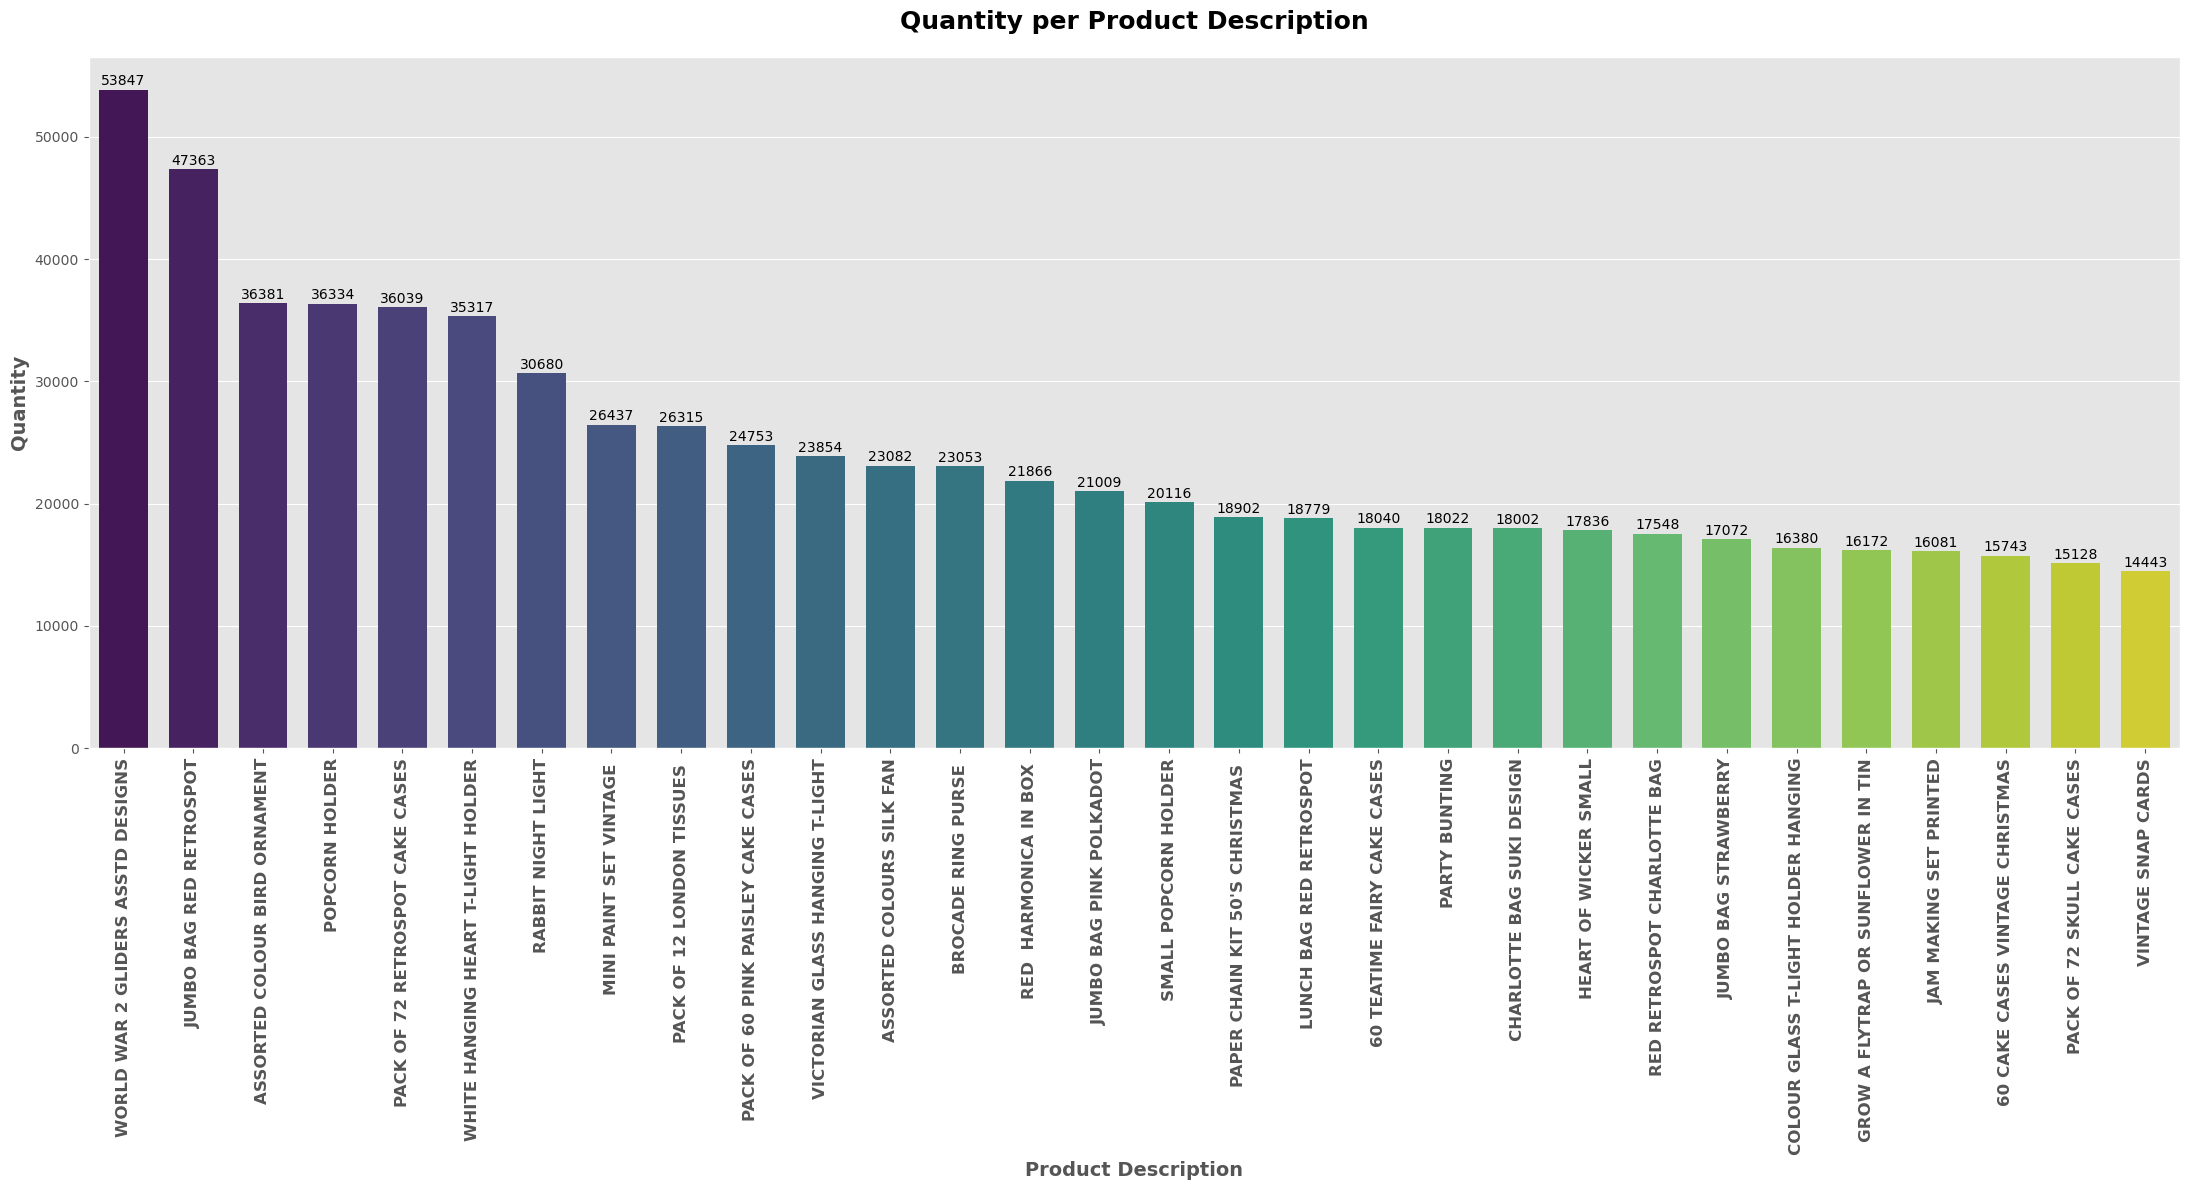

In [39]:
plt.figure(figsize=(22,12))
plt.style.use("ggplot")
ax=sns.barplot(data=quantity_per_description,x='Description',y='Quantity',width=.7,palette='viridis')
plt.xticks(rotation=90,fontweight='bold',fontsize=12)

for bars in ax.containers:
    ax.bar_label(bars,fmt='{:.0f}',padding=1)

plt.title("Quantity per Product Description", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Product Description", fontsize=14, fontweight="bold")
plt.ylabel("Quantity", fontsize=14, fontweight="bold")

plt.tight_layout()

plt.show()

# The top-selling item is WORLD WAR 2 GLIDERS ASSTD DESIGNS with 53,847 units.

# Other strong performers include JUMBO BAG RED RETROSPOT (47,363) and ASSORTED COLOUR BIRD ORNAMENT (36,381).



In [40]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month,Year,Year-Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12


In [41]:
# pd.set_option('display.max_rows',10000)

# _______Quantity per Customer by Country______________

In [42]:
quantity_per_customer_country=data.groupby(['CustomerID','Country'])['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False).head(40)


In [43]:
# quantity_per_customer_country

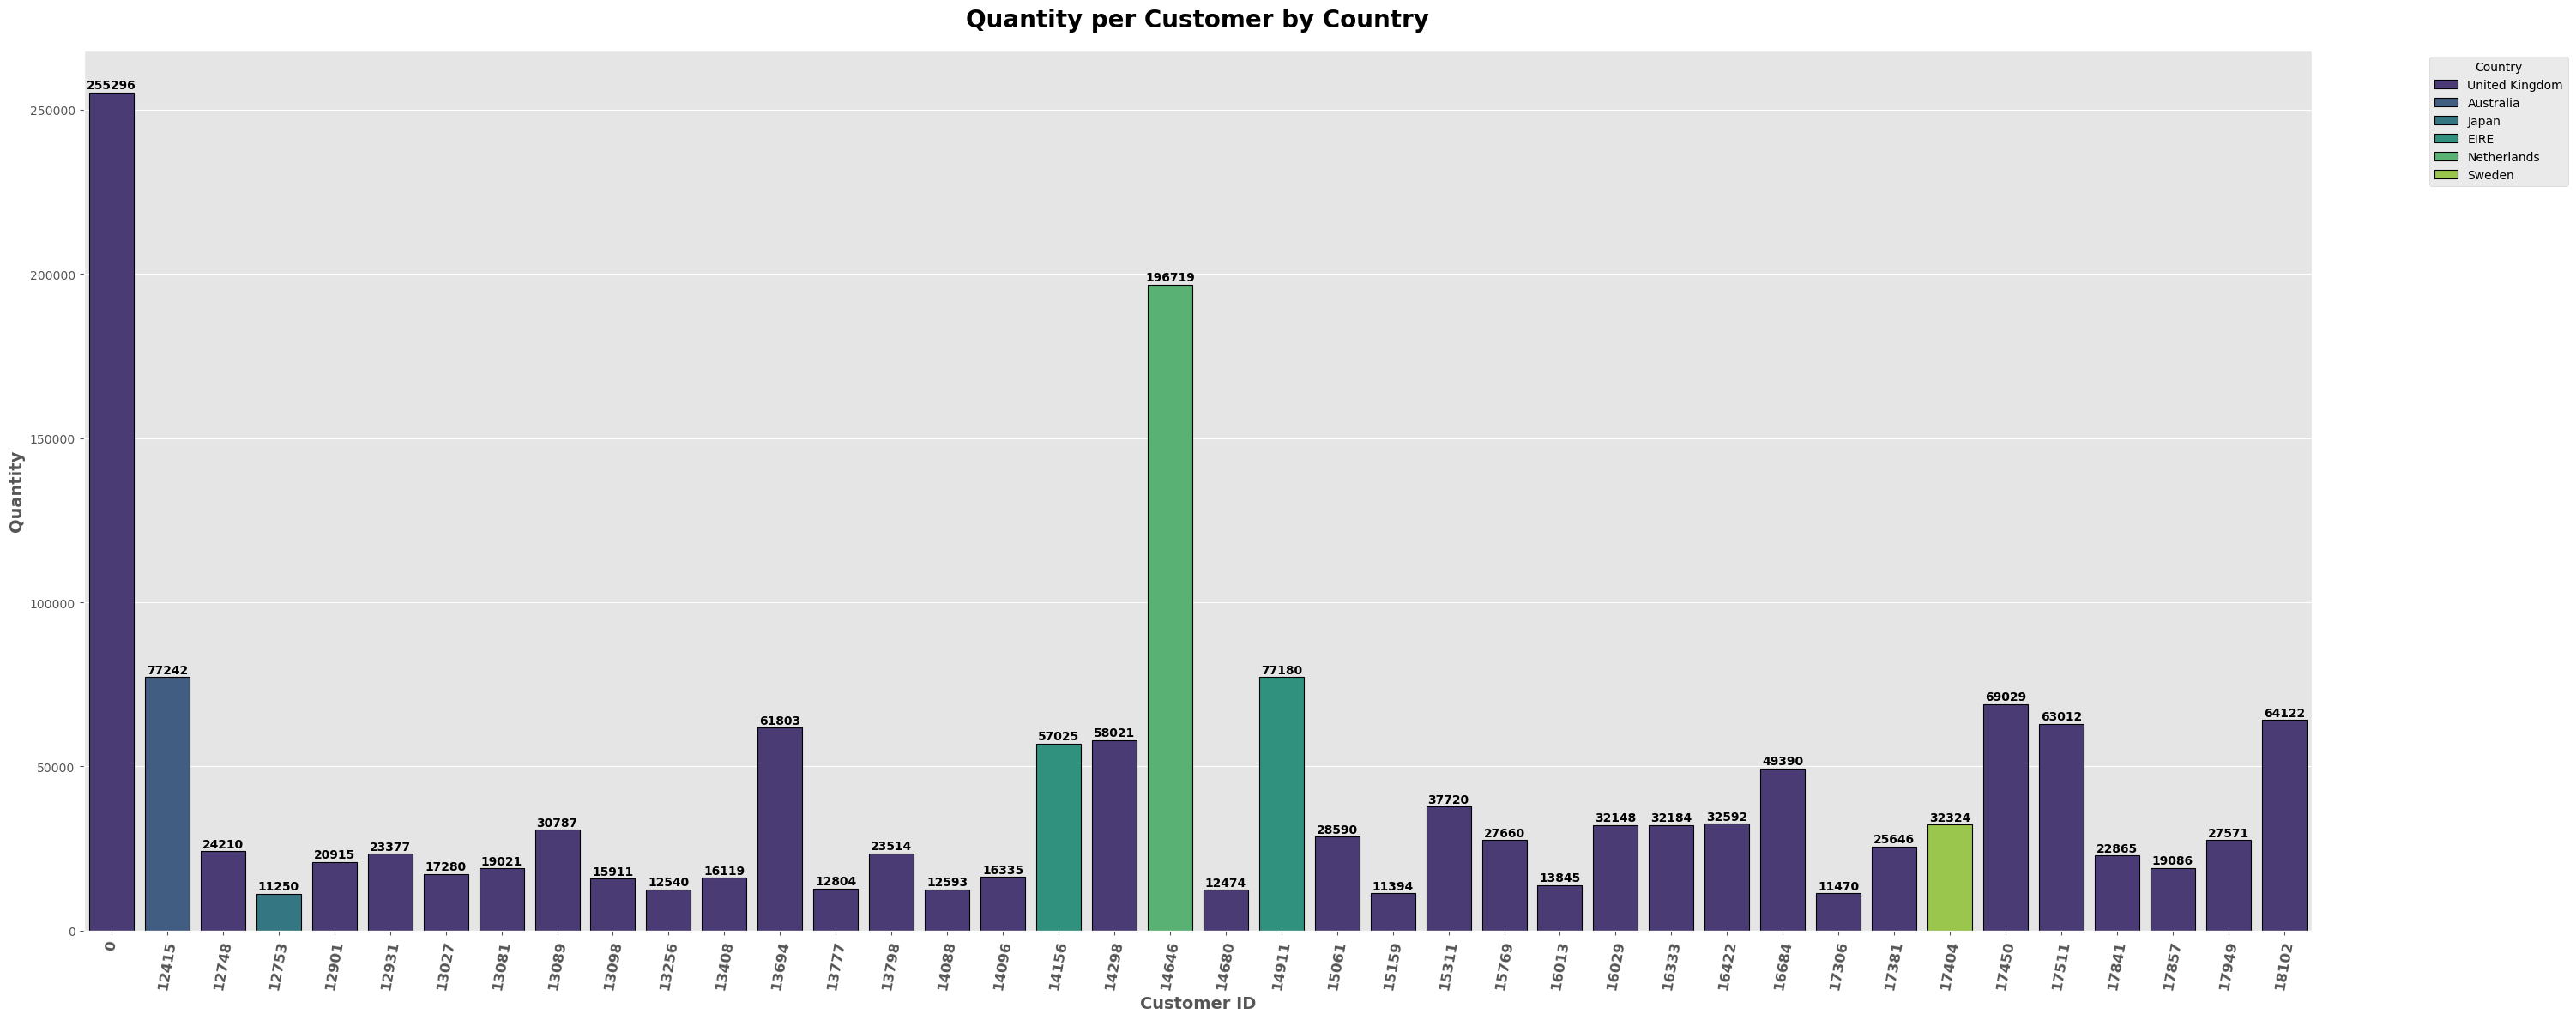

In [44]:
plt.figure(figsize=(30,12))
plt.style.use("ggplot")
ax=sns.barplot(data=quantity_per_customer_country,x='CustomerID',y='Quantity',hue='Country',width=.8,palette='viridis',edgecolor='black',lw=.8)
plt.xticks(rotation=80,fontweight='bold',fontsize=12)


for bars in ax.containers:
    ax.bar_label(bars,fmt='{:.0f}',padding=1,fontweight='bold')
    
plt.title("Quantity per Customer by Country", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Customer ID", fontsize=14, fontweight="bold")
plt.ylabel("Quantity", fontsize=14, fontweight="bold")

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# The largest customer is from the UK with over 255,000 units purchased.

# Other significant customers include Netherlands (196,719), Australia (77,242), and EIRE (77,180).

# The majority of top customers are based in the United Kingdom, dominating the top 40 list.

# A few international customers such as those from Sweden (32,324) and Japan (11,250) also appear.

In [45]:
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month,Year,Year-Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12


# _____Quantity by Country_____________

In [46]:
quantity_per_country=data.groupby(['Country'])['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)


In [47]:
# quantity_per_country

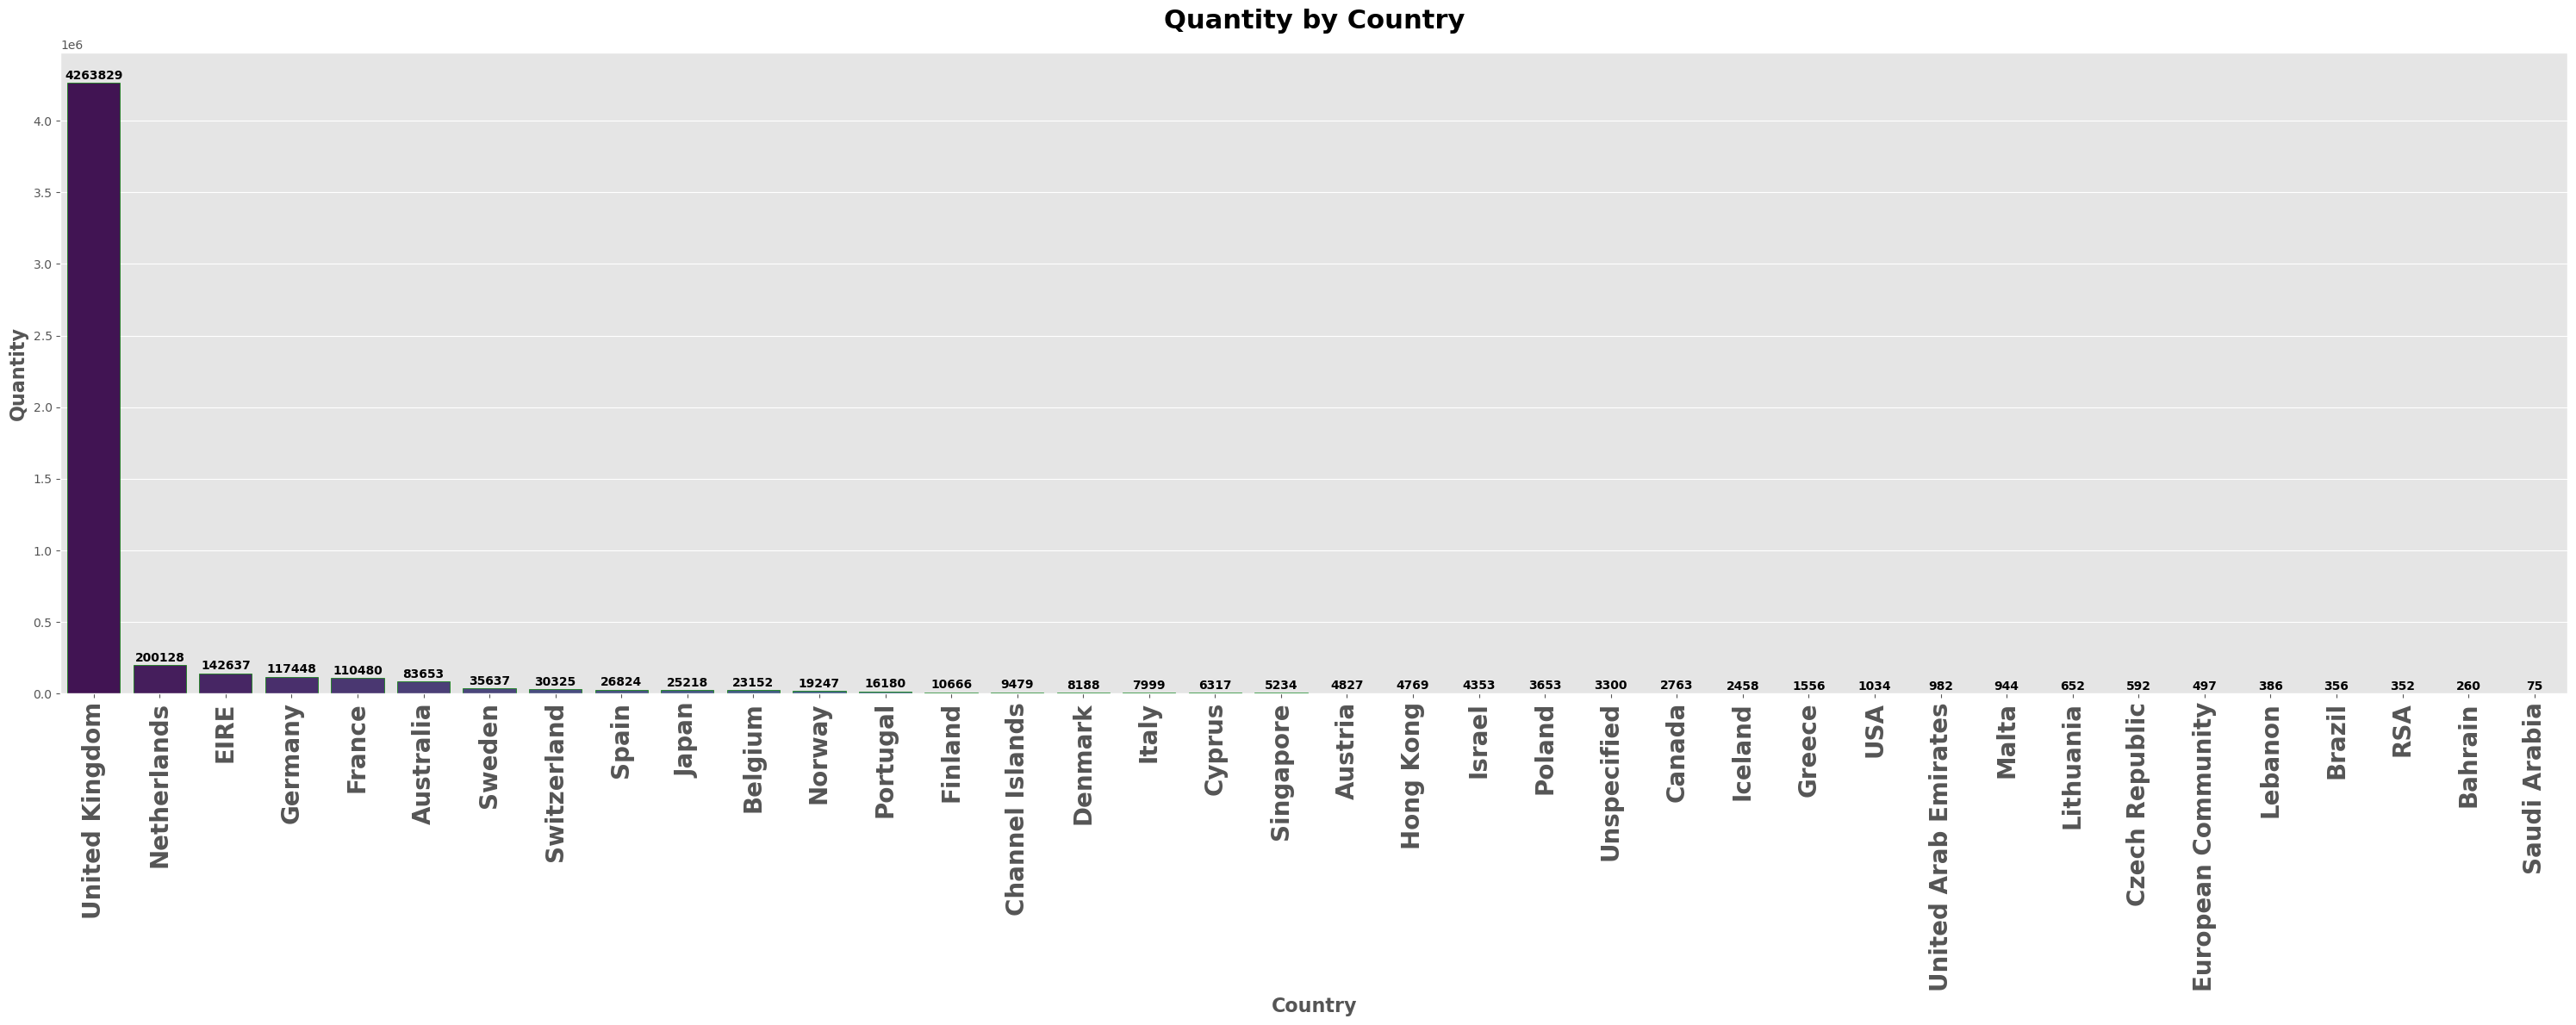

In [48]:
plt.figure(figsize=(30,12))
plt.style.use("ggplot")
ax=sns.barplot(data=quantity_per_country,x='Country',y='Quantity',width=.8,palette='viridis',edgecolor='green',lw=.5)




plt.xticks(rotation=90,fontweight='bold',fontsize=20)


for bars in ax.containers:
    ax.bar_label(bars,fmt='{:.0f}',padding=1,fontsize=10,fontweight='bold')


plt.title("Quantity by Country", fontsize=22, fontweight="bold", pad=20)
plt.xlabel("Country", fontsize=16, fontweight="bold")
plt.ylabel("Quantity", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

# The Netherlands (200K),
# EIRE (143K),
 # Germany (117K),
  # and France (110K) follow as the top international markets, but their volumes are much smaller compared to the UK.
   # Australia (84K) also shows a notable contribution. Most other countries record relatively low sales,
   #  generally below 40K units, with some markets such as Saudi Arabia, Bahrain, Brazil, and Malta showing minimal activity under 1K units.

In [49]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month,Year,Year-Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010,2010-12


# _______Total Price by CustomerID____________

In [50]:
customer_per_totalprice=data.groupby(['CustomerID'])['Total Price'].sum().reset_index().sort_values(by='Total Price'
,ascending=False).head(50)
# customer_per_totalprice

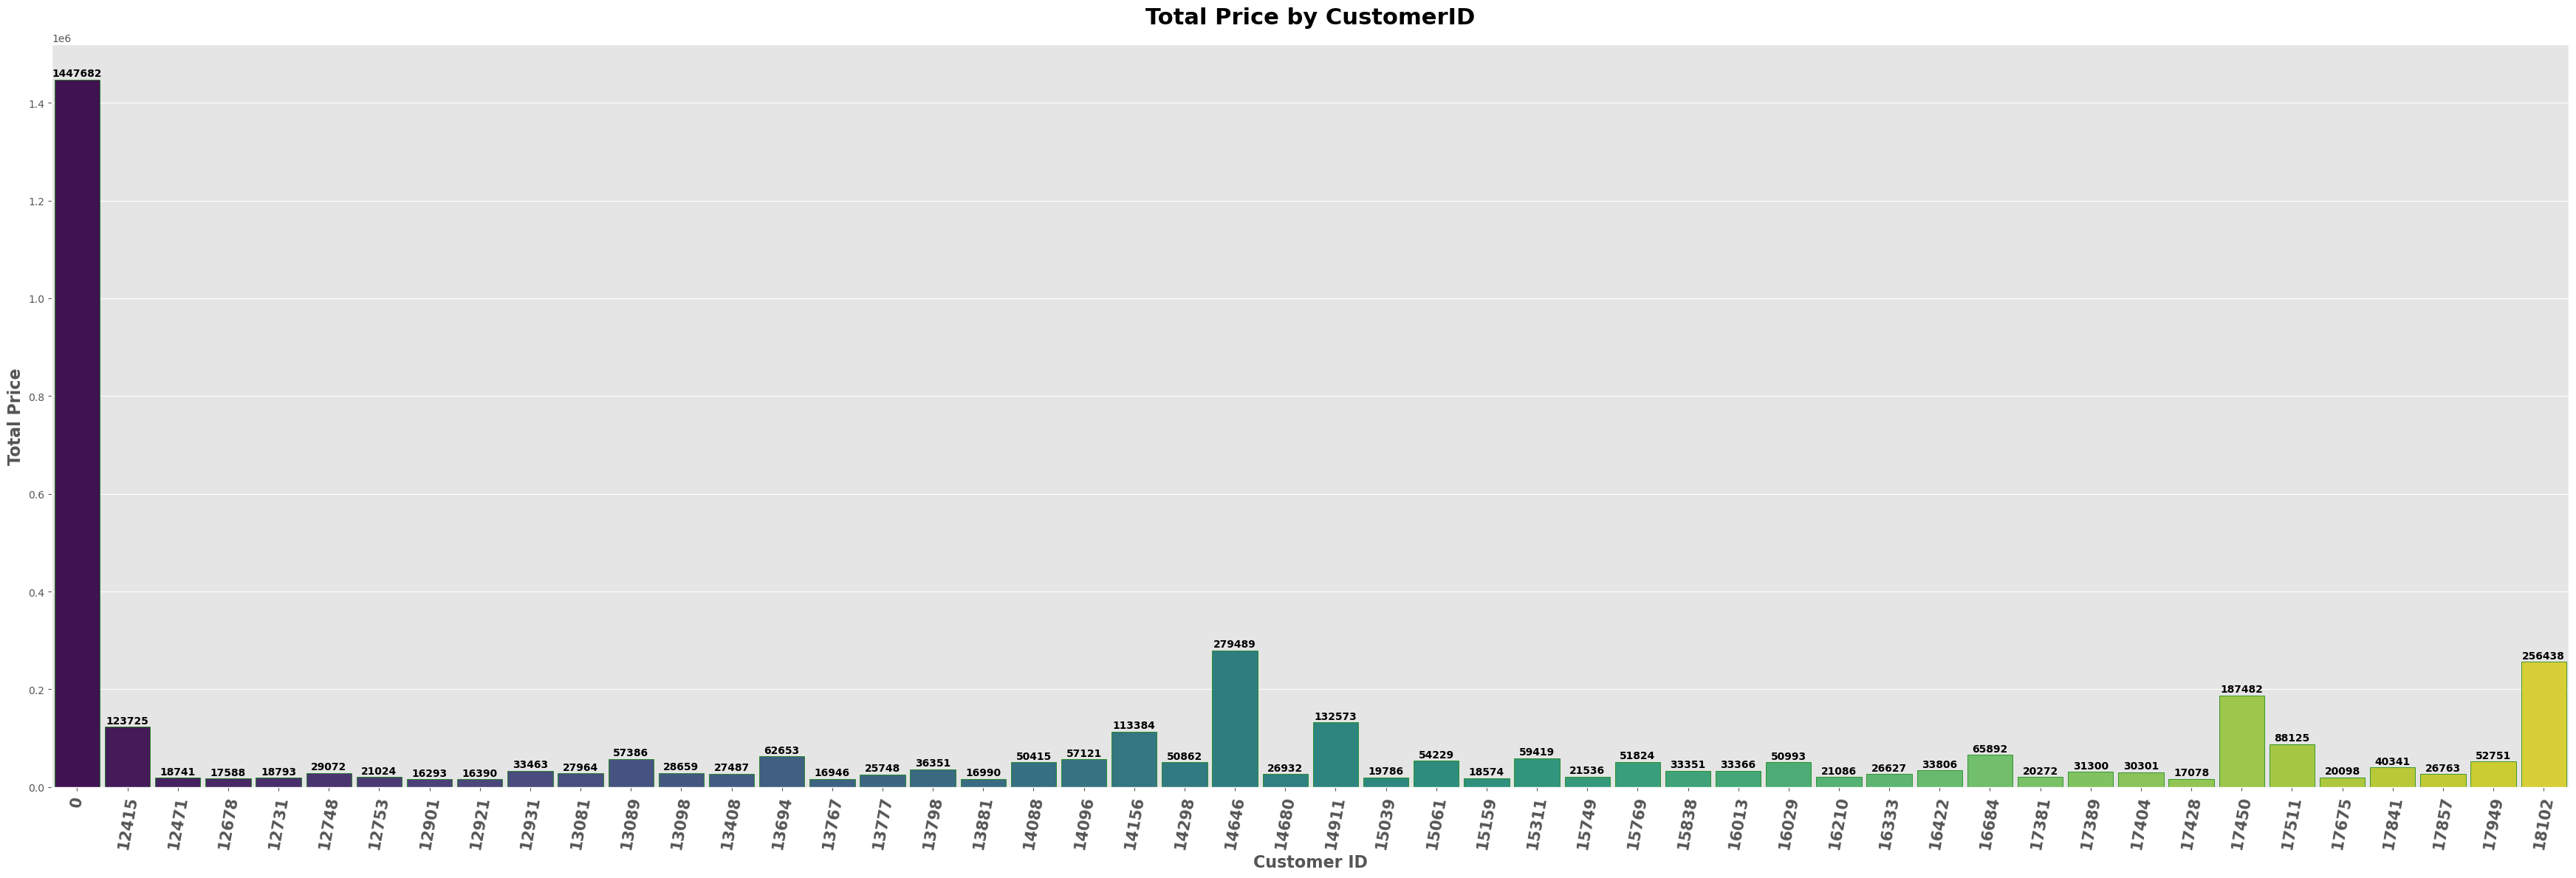

In [51]:
plt.figure(figsize=(35,12))
plt.style.use("ggplot")
ax=sns.barplot(data=customer_per_totalprice,x='CustomerID',y='Total Price',width=.9,palette='viridis',edgecolor='green',lw=.5)




plt.xticks(rotation=80,fontweight='bold',fontsize=15)


for bars in ax.containers:
    ax.bar_label(bars,fmt='{:.0f}',padding=1,fontsize=10,fontweight='bold')


plt.title("Total Price by CustomerID", fontsize=22, fontweight="bold", pad=20)
plt.xlabel("Customer ID", fontsize=16, fontweight="bold")
plt.ylabel("Total Price", fontsize=16, fontweight="bold")

plt.tight_layout()

plt.show()

# The customer with ID = 0 dominates by far, with a total spend of £1.45M, representing the largest single account. The next key customers are 14646 (£279K) and 18102 (£256K), followed by 17450 (£187K) and 14911 (£133K). Most other top customers range between £50K–£120K in spending, with a gradual decline towards smaller accounts near £16K–£20K at the bottom of the top 50 list.

In [52]:
data.to_excel('DATA.xlsx',index=False)